In [2]:
''' Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows. '''

import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

# Displaying the first 10 rows
print(df.head(10))


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [5]:
'''Question 2: Check for missing values in all columns and describe your approach for
handling them.'''

import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

print(df.isnull().sum())

print((df.isnull().sum() / len(df)) * 100)

''' WE HAVE FOUND SOME MISSING VALUES
WAYS TO HANDLE THE MISSING VALUES

1. WE CAN DROP THE ROWS HAVING MISSING VALUES
    we can drop the rows where values are missing by using 
    df.dropna()

2. We can handle the missing value by using the mean, median or mode 
    according to the need

3. If there are too many missing values for a particular column then we 
    can drop the column unless its too important
'''

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


' WE HAVE FOUND SOME MISSING VALUES\nWAYS TO HANDLE THE MISSING VALUES\n\n1. WE CAN DROP THE ROWS HAVING MISSING VALUES\n    we can drop the rows where values are missing by using \n    df.dropna()\n\n2. We can handle the missing value by using the mean, median or mode \n    according to the need\n\n3. If there are too many missing values for a particular column then we \n    can drop the column unless its too important\n'

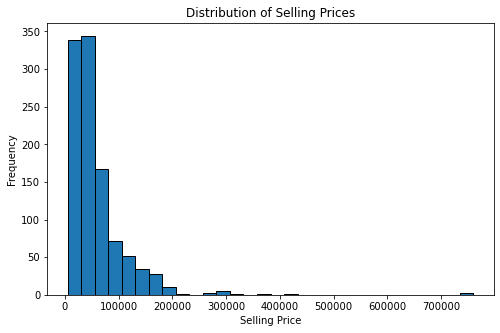

'It is seen the overall trend that the most bikes are\nsold under the selling price of 200000 and a very few above 200000\n\nMost bikes are sold in the selling price range of 100000 to 200000 '

In [7]:
'''Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend. '''

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

'''It is seen the overall trend that the most bikes are
sold under the selling price of 200000 and a very few above 200000

Most bikes are sold in the selling price range of 100000 to 200000 '''

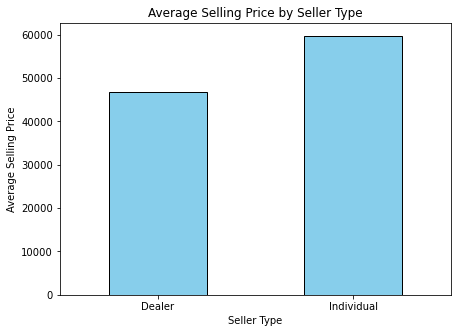

'It is observed that an Individual Seller has a higher average selling price than that of a dealer'

In [9]:
'''Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.
'''

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")

avg_price = df.groupby("seller_type")["selling_price"].mean()


plt.figure(figsize=(7,5))
avg_price.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=0)
plt.show()

'''It is observed that an Individual Seller has a higher average selling price than that of a dealer'''

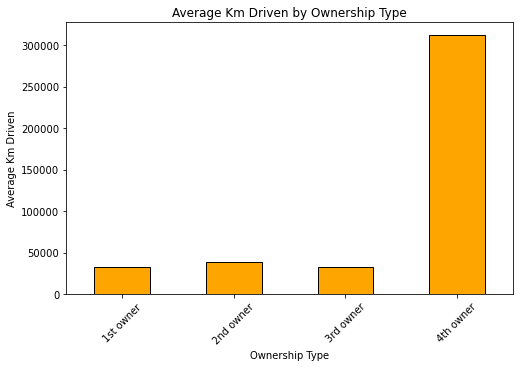

'It is been observed that a 4th owner bike has a significantly more km_driven average than 1st Owner'

In [11]:
''' Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
'''
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")

avg_km = df.groupby("owner")["km_driven"].mean()

plt.figure(figsize=(8,5))
avg_km.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Average Km Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average Km Driven")
plt.xticks(rotation=45)
plt.show()

'''It is been observed that a 4th owner bike has a significantly more km_driven average than 1st Owner'''

In [13]:
'''Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
'''
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

print("Before Removing Outliers:")
print(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\nAfter Removing Outliers:")
print(df_clean['km_driven'].describe())

'''It is observed that after removing the outliers the mean has dropped down to 28203 from 34359'''

Before Removing Outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After Removing Outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


'It is observed that after removing the outliers the mean has dropped down to 28203 from 34359'

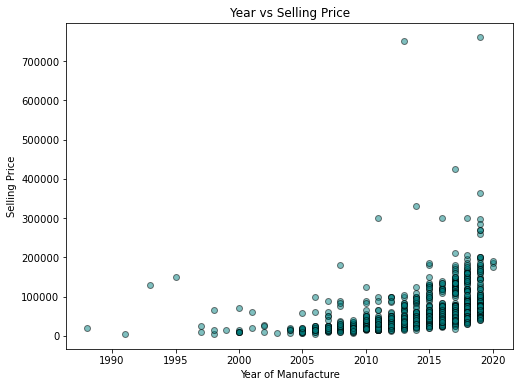

'It is observed that the selling price in the recent years the selling price has gone up'

In [16]:
''' Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
'''

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")

plt.figure(figsize=(8,6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5, color="teal", edgecolors="black")
plt.title("Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()

'''It is observed that the selling price in the recent years the selling price has gone up'''

In [17]:
''' Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
'''

import pandas as pd

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Check unique values in seller_type column
print(df['seller_type'].unique())


['Individual' 'Dealer']


In [18]:

df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


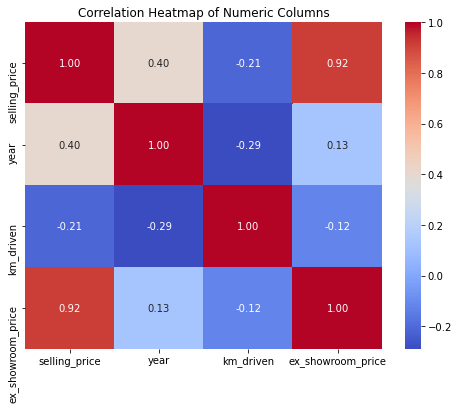

'It is observed\n1. There is a positive correlation between the ex-showroom_price and the selling_price\n2. There is a positive correlation between the year and selling_price\n3. There is a negative correlation between the km_driven and the selling price\n\nand the Correlation that stands out the most is the positive correlation between the ex_showroom price and the selling price\nwhich is 0.92\n'

In [20]:
''' Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")

numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

'''It is observed
1. There is a positive correlation between the ex-showroom_price and the selling_price
2. There is a positive correlation between the year and selling_price
3. There is a negative correlation between the km_driven and the selling price

and the Correlation that stands out the most is the positive correlation between the ex_showroom price and the selling price
which is 0.92
'''

In [21]:
'''Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.
'''

'''
Report :
 The most important factors that affects a bike's selling price are 
 1. The ex-Showroom price
 2. The km_driven
 3. Year
 
 Data cleaning that I performed is 
 Removing the null values
 and feature engineering I performed is
 one-hot encoding to convert the categorical values in the seller_type to get a binary value (True or False)
'''

"\nReport :\n The most important factors that affects a bike's selling price are \n 1. The ex-Showroom price\n 2. The km_driven\n 3. Year\n \n Data cleaning that I performed is \n Removing the null values\n and feature engineering I performed is\n one-hot encoding to convert the categorical values in the seller_type to get a binary value (True or False)\n"